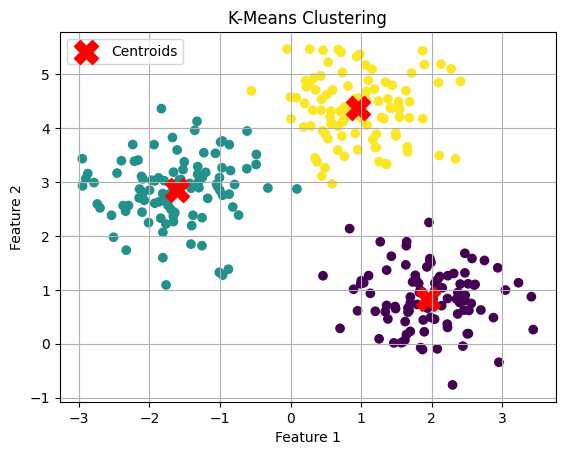

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Generate data
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=0)

# Step 2: Fit the model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Step 3: Predict the cluster each point belongs to
y_kmeans = kmeans.predict(X)

# Step 4: Plot the results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c='red',
    marker='X',
    label="Centroids"
)
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


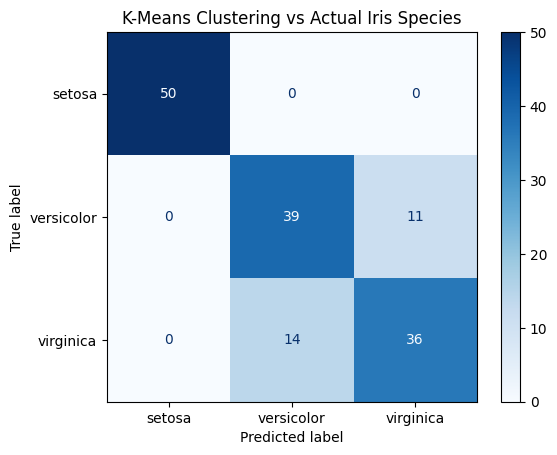

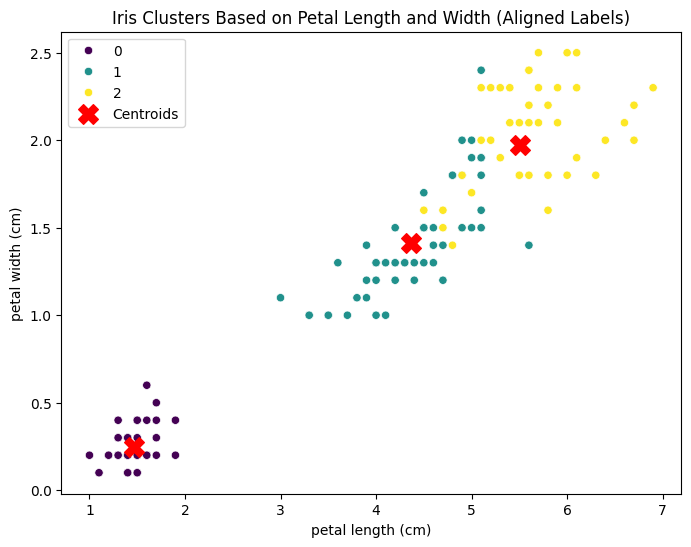

In [19]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import mode
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Iris dataset from sklearn
iris_sklearn = load_iris()
X = iris_sklearn.data
y_true = iris_sklearn.target
feature_names = iris_sklearn.feature_names
target_names = iris_sklearn.target_names

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

# Align cluster labels to true labels using mode
label_mapping = {}
for i in range(3):
    mask = (y_kmeans == i)
    most_common = mode(y_true[mask], keepdims=True).mode[0]
    label_mapping[i] = most_common
y_aligned = np.vectorize(label_mapping.get)(y_kmeans)

# Plot confusion matrix
cm = confusion_matrix(y_true, y_aligned)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title("K-Means Clustering vs Actual Iris Species")
plt.show()

# Scatter plot with petal_length and petal_width
iris_df = pd.DataFrame(X, columns=feature_names)
iris_df["cluster"] = y_aligned
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=iris_df["petal length (cm)"],
    y=iris_df["petal width (cm)"],
    hue=iris_df["cluster"],
    palette="viridis",
    legend="full"
)
plt.scatter(
    centroids_original[:, 2],  # petal length
    centroids_original[:, 3],  # petal width
    c='red',
    marker='X',
    s=200,
    label="Centroids"
)
plt.title("Iris Clusters Based on Petal Length and Width (Aligned Labels)")
plt.legend()
plt.show()


